In [1]:
library('data.table')
library('qtl')

In [2]:
load('20201201_rqtl_all_fixedprecorr_andnormbw_perm.Rdata')

In [3]:
# significance threshold
summary(out.hk.normBW8.perm)

LOD thresholds (10000 permutations)
     lod
5%  3.80
10% 3.47

In [6]:
write.csv(out.hk.normBW8, '20201214_normbw8_hk_scan.out.csv')

In [7]:
out.hk.normBW8.perm2 <- scanone(test2, pheno.col = 4,  method='hk', addcovar = ac_sex, n.perm = 1000) 

Permutation 20 
Permutation 40 
Permutation 60 
Permutation 80 
Permutation 100 
Permutation 120 
Permutation 140 
Permutation 160 
Permutation 180 
Permutation 200 
Permutation 220 
Permutation 240 
Permutation 260 
Permutation 280 
Permutation 300 
Permutation 320 
Permutation 340 
Permutation 360 
Permutation 380 
Permutation 400 
Permutation 420 
Permutation 440 
Permutation 460 
Permutation 480 
Permutation 500 
Permutation 520 
Permutation 540 
Permutation 560 
Permutation 580 
Permutation 600 
Permutation 620 
Permutation 640 
Permutation 660 
Permutation 680 
Permutation 700 
Permutation 720 
Permutation 740 
Permutation 760 
Permutation 780 
Permutation 800 
Permutation 820 
Permutation 840 
Permutation 860 
Permutation 880 
Permutation 900 
Permutation 920 
Permutation 940 
Permutation 960 
Permutation 980 
Permutation 1000 


In [ ]:
out.h

In [4]:
# suggestive threshold
summary(out.hk.normBW8.chr4.perm)

LOD thresholds (10000 permutations)
     lod
5%  2.67
10% 2.35

# extract positions

,chr,pos,lod
,<fct>,<dbl>,<dbl>
1-3,1,3e-07,0.3836297


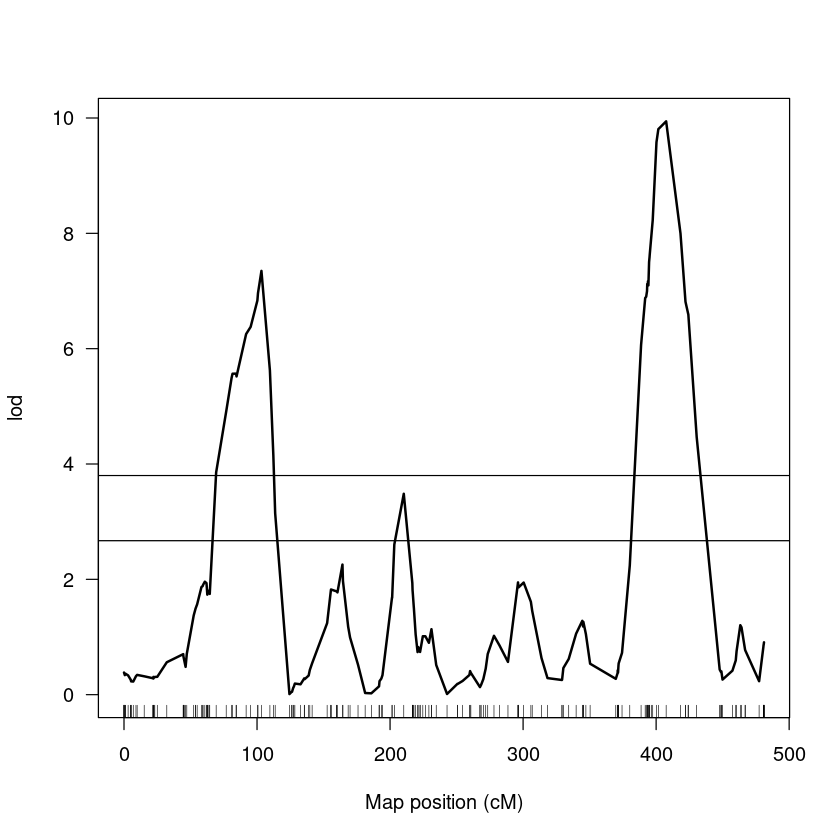

In [6]:
chr=1
xlim = c(0, 1)

plot(out.hk.normBW8, chr=chr)
#, xlim= xlim)
abline(h=2.67)
abline(h=3.8)
max(out.hk.normBW8[out.hk.normBW8$chr==chr & out.hk.normBW8$pos > xlim[1] &  out.hk.normBW8$pos < xlim[2],])


In [ ]:
1-56	1	103.3114	7.34855
1-93	1	210.3056	3.483738
1-171	1	407.5344	9.942103
2-38	2	99.8333	2.71965
3-35	3	55.32679	3.858462
3-75	3	129.8254	6.46597
4-16	4	53.46288	6.751819
4-34	4	102.7869	9.705534
4-70	4	187.9333	3.57892
5-1	5	1e-07	3.004671 # sex chr
5-36	5	76.37422	4.170126 # sex chr
6-30	6	78.66078	4.228023
7-1	7	1e-07	4.165992
7-22	7	50.22548	11.98618
11-13	11	17.01542	5.478634
13-8	13	4.298689	4.148115
14-12	14	22.88642	4.747564
15-6	15	14.30345	4.095187
27-7	27	7e-07	2.729503

In [112]:
chr = c(1,1,1,2,3,3,4,4,4,5,5,6,7,7,11,13,14,15,27)
pos = c(103.3114, 210.3056,407.5344,99.8333,55.32679,129.8254,53.46288,102.7869,187.9333,1e-07,76.37422,78.66078,1e-07,50.22548,17.01542,4.298689,22.88642,14.30345,7e-07)

In [113]:
qtls <- makeqtl(test2, chr = chr, pos = pos, what = 'prob' )

In [114]:
# fit qtls on norm_bw8 data
fit_sugg <- fitqtl(test2, pheno.col = 4, qtl = qtls, get.ests=TRUE, covar = data.frame(ac_sex))

Warning message in fitqtl(test2, pheno.col = 4, qtl = qtls, get.ests = TRUE, covar = data.frame(ac_sex)):
“The qtl object doesn't contain imputations; using method="hk".”


In [115]:
# fit qtls on precorrected data
fit_sugg <- fitqtl(test2, pheno.col = 8, qtl = qtls, get.ests=TRUE,)

Warning message in fitqtl(test2, pheno.col = 8, qtl = qtls, get.ests = TRUE, ):
“The qtl object doesn't contain imputations; using method="hk".”


ERROR: Error in eval(expr, envir, enclos): object 'ac' not found


In [116]:
summary(fit_sugg)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 
                    + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 

        df       SS        MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   38  6371498 167671.01 65.59621 9.362477            0         0
Error 3034 61682059  20330.28                                         
Total 3072 68053557                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
        df Type III SS    LOD    %var F value Pvalue(Chi2) Pvalue(F)    
1@103.3  2      397709 4.2887 0.58441   9.781        0.000  5.83e-05 ***
1@210.3  2      387306 4.1769 0.56912   9.525        0.000  7.52e-05 ***
1@407.5  2      718335 7.7262 1.05554  17.667        0.000  2.35e-08 ***
2@99.8   2      100255 1.0837 0.14732   

In [107]:
chrom <- chr
for (qtl in seq(1,length(chrom))){
    curr_chrom <- chrom[qtl]
    curr_pos <- pos[qtl]
    qtls <- makeqtl(test2, chr = curr_chrom, pos = curr_pos, what = 'prob')
    fit_sugg <- fitqtl(test2, pheno.col = 3, qtl = qtls, covar = data.frame(ac_sex),  get.ests=TRUE, method = 'hk')
    print(summary(fit_sugg))
}


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + ac_sex 

        df        SS         MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model    3  16017797 5339265.75 107.1633 14.83621            0         0
Error 3069  91946389   29959.72                                         
Total 3072 107964187                                                    


Drop one QTL at a time ANOVA table: 
----------------------------------  
        df Type III SS   LOD   %var F value Pvalue(Chi2) Pvalue(F)    
1@103.3  2     1113096  8.03  1.031   18.58            0  9.57e-09 ***
ac_sex   1    14831067 99.79 13.737  495.03            0   < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Estimated effects:
-----------------
               est       SE       t
Intercept 542.5660   4.3277 125.371
ac_sex    139.1745   6.2552  22.249
1@103.3a 

# make subset that doesnt contain the F8s

In [12]:
test2_nof8 = subset(test2, ind=test2$pheno['GENERATION']!=8)

# fit qtls for normbw8 - with and without F8

In [19]:
chr = c(1,1,1,2,3,3,4,4,4,5,5,6,7,7,11,13,14,15,27)
pos = c(103.3114, 210.3056,407.5344,99.8333,55.32679,129.8254,53.46288,102.7869,187.9333,1e-07,76.37422,78.66078,1e-07,50.22548,17.01542,4.298689,22.88642,14.30345,7e-07)

In [26]:
#test2_nof8$pheno


In [55]:
qtls_nof8 <- makeqtl(test2_nof8, chr = chr, pos = pos, what = 'prob' )
f8_ac_sex <- data.frame(pull.pheno(test2_nof8, pheno.col = 6))

In [56]:
fit_sugg_nof8_normbw8 <- fitqtl(test2_nof8, pheno.col = 4, qtl = qtls_nof8, get.ests=TRUE, covar = f8_ac_sex, method = 'hk' )

In [47]:
#summary(fit_sugg_nof8_normbw8)

In [51]:
qtls <- makeqtl(test2, chr = chr, pos = pos, what = 'prob' )
ac_sex <- data.frame(pull.pheno(test2, pheno.col = 6))
fit_sugg_normbw8 <- fitqtl(test2, pheno.col = 4, qtl = qtls, get.ests=TRUE, covar = ac_sex, method = 'hk' )

In [60]:
summary(fit_sugg_normbw8)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 3073 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 
                    + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 + 
                    pull.pheno.test2..pheno.col...6. 

        df         SS           MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   39 0.02987627 7.660581e-04 203.4243 26.27659            0         0
Error 3033 0.08382293 2.763697e-05                                         
Total 3072 0.11369919                                                      


Drop one QTL at a time ANOVA table: 
----------------------------------  
                                 df Type III SS      LOD     %var F value
1@103.3                           2   7.441e-04   5.8976  0.65446  13.462
1@210.3                           2   6.462e-04   5.1248  0.56837  11.692
1@407.5                           

In [57]:
qtls_nof8 <- makeqtl(test2_nof8, chr = chr, pos = pos, what = 'prob' )
f8_ac_sex <- data.frame(pull.pheno(test2_nof8, pheno.col = 6))
fit_sugg_nof8_precorr <- fitqtl(test2_nof8, pheno.col = 8, qtl = qtls_nof8, get.ests=TRUE, method = 'hk' )

In [59]:
summary(fit_sugg_nof8_precorr)


		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 2784 

Full model result
----------------------------------  
Model formula: y ~ Q1 + Q2 + Q3 + Q4 + Q5 + Q6 + Q7 + Q8 + Q9 + Q10 + Q11 + Q12 
                    + Q13 + Q14 + Q15 + Q16 + Q17 + Q18 + Q19 

        df       SS        MS      LOD     %var Pvalue(Chi2) Pvalue(F)
Model   38  5380498 141592.06 54.23193 8.580196            0         0
Error 2745 57327837  20884.46                                         
Total 2783 62708336                                                   


Drop one QTL at a time ANOVA table: 
----------------------------------  
        df Type III SS    LOD    %var F value Pvalue(Chi2) Pvalue(F)    
1@103.3  2      257389 2.7082 0.41045   6.162        0.002  0.002137 ** 
1@210.3  2      372389 3.9142 0.59384   8.915        0.000  0.000138 ***
1@407.5  2      713417 7.4768 1.13767  17.080        0.000  4.25e-08 ***
2@99.8   2       51127 0.5389 0.08153   